In [1]:
%matplotlib inline
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import astropy.io.fits as pyfits
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import kmtnet_xtalk as xtalk


In [13]:
mef = pyfits.open("kmtc.20150211.003569.fits.fz")

#i = 0
#hdu_list = mef[8*i+1:8*i+9]
hdu_list = mef[1:]

In [14]:
thresh_list = xtalk.estimate_saturation_level(hdu_list)
thresh_list

[56836.62766423426,
 53642.48098687546,
 58016.78894776815,
 60008.79327921036,
 60007.64598863953,
 58576.438103823166,
 57193.11573314971,
 56016.32299424128,
 61652.45774524553,
 62213.86960136857,
 62038.44764457491,
 61401.16408109902,
 63370.178924091604,
 66338.12877468683,
 66772.60468324955,
 67694.36690224092,
 52805.654688009425,
 58131.539897645605,
 58685.11734939979,
 54254.520363974385,
 61397.22313503941,
 60903.67835944722,
 58561.54841821417,
 62155.124182027386,
 41353.748891514755,
 58021.642036221405,
 44635.96120792828,
 59641.71384388215,
 63104.4221938331,
 42902.978498509634,
 49107.381701673905,
 46591.22880174316]

In [33]:
# source, victim pair to check
sv_list0 = [(i, j) for i in range(8) for j in range(8)
           if (i != j)]

offsets = [0, 8, 16, 24]

In [51]:
# For each pair of source & victim, found out flip and roll.
# This may take a few minute to finish
od = xtalk.find_flip_roll_dict(hdu_list, thresh_list, offsets=offsets,
                               sv_list=sv_list0,
                               return_coeff=True)


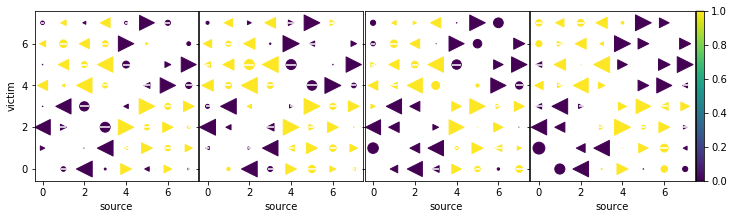

In [89]:
# plot flip value for s,v pairs
# Size of the circle is proportional to the log(coefficient).


from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(2, figsize=(12, 6))
fig.clf()
grid = ImageGrid(fig, 111, (1, 4), cbar_mode="single")
for ax, o in zip(grid, offsets):
    #ax = fig.add_subplot(111, aspect=1)

    sv_list = [(s + o, v + o) for (s, v) in sv_list0]
    s = [sv[0] for sv in sv_list0]
    v = [sv[1] for sv in sv_list0]
    d = [np.abs(sv[0] - sv[1]) for sv in sv_list]

    sl = slice(o, o+8)
    flip = np.array([od[sv][0][0] for sv in sv_list])
    roll = np.array([od[sv][0][1] for sv in sv_list])
    coeff = [od[sv][1] for sv in sv_list]
    coeff_sign = np.sign(coeff)
    coeff3 = np.clip(np.log10(np.abs(coeff)), -5, 0)

    for r, m in zip([-1, 0, 1], ["<", "o", ">"]):
        msk = roll == r
        sc = ax.scatter(np.array(s)[msk], np.array(v)[msk], c=flip[msk], s=(coeff3[msk]+5.1)**2*30, marker=m)

    msk = coeff_sign < 0.
    ax.scatter(np.array(s)[msk], np.array(v)[msk], c="w", s=(coeff3[msk]+5.1)**2*30, marker="_")
    
    ax.set_xlabel("source")
    ax.set_ylabel("victim")

grid[0].cax.colorbar(sc)



In [93]:
# check individual pair

from ipywidgets import interact_manual

def plot_source_victim(o, s, v):
    fig = plt.figure(3, figsize=(8, 6))

    fig.clf()
    fig.suptitle("o={} s={} v={}".format(o, s, v))
    if (s == v):
        return
    source_i, victim_i = o + s, o + v

    xtalk.get_flip_roll(hdu_list, source_i, victim_i, thresh_list,
                        fig=fig, subplot_spec="111")

# plot_source_victim(0, 1, 3)
interact_manual(plot_source_victim, o=(0, 24, 8), s=(0, 7), v=(0, 7))


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT04LCBkZXNjcmlwdGlvbj11J28nLCBtYXg9MjQsIHN0ZXA9OCksIEludFNsaWRlcih2YWx1ZT0zLCBkZXNjcmlwdGlvbj11J3PigKY=


<function __main__.plot_source_victim>

In [96]:
flip_roll_dict = dict((k, v[0]) for (k, v) in od.items())
ratio_dict = dict((k, v[1]) for (k, v) in od.items())
df = xtalk.convert_to_dataframe(ratio_dict, flip_roll_dict)
df.head()

,coeff,distance,flip,roll,sou,vic
0,5.030631e-05,1,False,1,0,1
1,5.268165e-03,2,False,-1,0,2
2,8.751365e-06,3,False,-1,0,3
3,5.627704e-04,4,True,-1,0,4
4,1.358003e-07,5,False,0,0,5


In [94]:
victim_i = 0
im0 = xtalk.get_xtalk_image(hdu_list, victim_i, df, thresh=0.1)


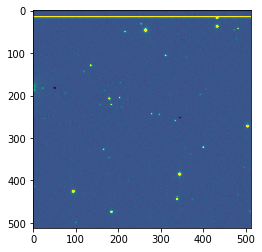

In [95]:
imshow(im0[:512, :512], vmin=0, vmax=10)